查看基本的表结构

In [1]:
import pandas as pd

ratings = pd.read_csv(
    "../datasets/ml-1m/ratings.dat",
    sep="::",
    engine="python",
    names=["userId", "movieId", "rating", "timestamp"],
)
ratings.head()


,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [2]:
movies = pd.read_csv(
    "../datasets/ml-1m/movies.dat",
    sep="::",
    engine="python",
    names=["movieId", "title", "genres"],
)
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


合并并查看合并后的表

In [3]:
df = pd.merge(ratings, movies[['movieId', 'title']], on='movieId')
df.head()


,userId,movieId,rating,timestamp,title
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975)
1,1,661,3,978302109,James and the Giant Peach (1996)
2,1,914,3,978301968,My Fair Lady (1964)
3,1,3408,4,978300275,Erin Brockovich (2000)
4,1,2355,5,978824291,"Bug's Life, A (1998)"


In [4]:
num_ratings = len(df)
num_users = df['userId'].nunique()
num_movies = df['movieId'].nunique()
print(f"Number of ratings: {num_ratings}")
print(f"Number of users: {num_users}")
print(f"Number of movies: {num_movies}")

Number of ratings: 1000209
Number of users: 6040
Number of movies: 3706


查看评分的基本分布

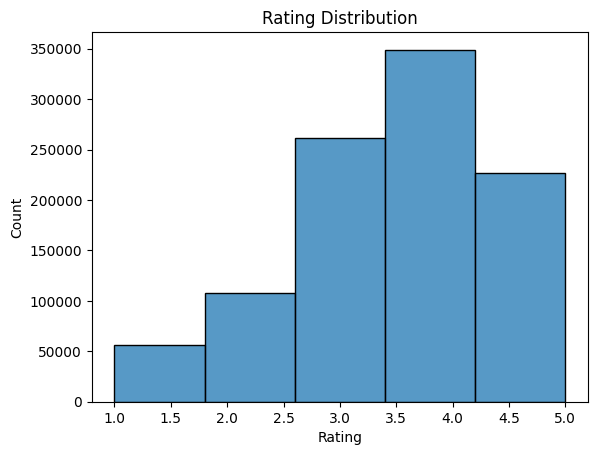

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['rating'], bins=5, kde=False)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


查看每个用户评分数量的分布

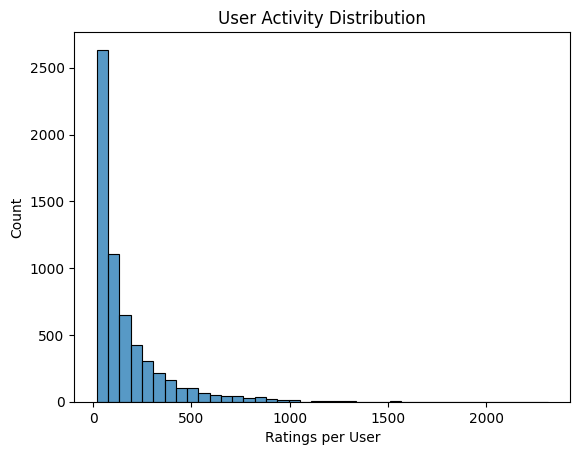

In [6]:
user_activity = df.groupby('userId')['rating'].count()
sns.histplot(user_activity, bins=40)
plt.title("User Activity Distribution")
plt.xlabel("Ratings per User")
plt.ylabel("Count")
plt.show()


部分用户评分过多，去除评分过多1%的用户后的结果如下

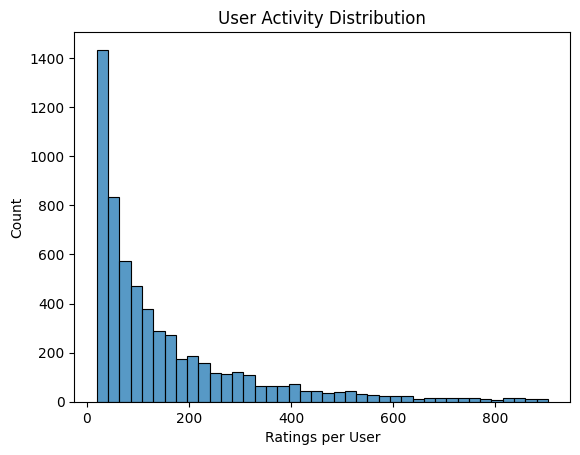

In [7]:
threshold = user_activity.quantile(0.99)
sns.histplot(user_activity[user_activity < threshold], bins=40)

plt.title("User Activity Distribution")
plt.xlabel("Ratings per User")
plt.ylabel("Count")
plt.show()

把电影按照评分数量进行排序

In [8]:
popular_movies = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
print(popular_movies)


title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: rating, dtype: int64


由于数据集过大，这里采用仅读取前2000个用户与电影评分的矩阵

In [9]:
small_df = df[df['userId'] < 2000]
rating_matrix = small_df.pivot_table(index='userId', columns='title', values='rating')

rating_matrix.head()

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",...,Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


发现每个用户其实只对很少的几个用户有评分，所以我们这里只查看用户有评分的电影

In [10]:
rating_matrix.loc[1].dropna()

title
Airplane! (1980)                                          4.0
Aladdin (1992)                                            4.0
Antz (1998)                                               4.0
Apollo 13 (1995)                                          5.0
Awakenings (1990)                                         5.0
Back to the Future (1985)                                 5.0
Bambi (1942)                                              4.0
Beauty and the Beast (1991)                               5.0
Ben-Hur (1959)                                            5.0
Big (1988)                                                4.0
Bug's Life, A (1998)                                      5.0
Christmas Story, A (1983)                                 5.0
Cinderella (1950)                                         5.0
Close Shave, A (1995)                                     3.0
Dead Poets Society (1989)                                 4.0
Driving Miss Daisy (1989)                                 4.0
Du